In [2]:
import praw
import numpy as np
import requests
from PIL import Image
from io import BytesIO
import tensorflow as tf
import os
from matplotlib import pyplot as plt

C:\Users\Kaustubh Virkar\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
import cv2
import imghdr

In [4]:
def config_reddit():
    reddit = praw.Reddit(
    client_id=os.getenv("client_id"),
    client_secret=os.getenv("client_secret"),
    password=os.getenv("password"),
    user_agent=os.getenv("user_agent"),
    username=os.getenv("username")
    )
    return reddit

<h1> Data Gathering </h1>
<ul>
    <li> Scraping Data from Google images using the "Download all images Extension" </li>
    <li> Retrieving data from reddit </li>
    <li> Getting textual dataset from kaggle</li>
    </ul>

In [ ]:
#Downloding sfw dataset

subreddit = reddit.subreddit("pics")
# Fetch the top 10 SFW image posts from the subreddit
count = 0
for idx, submission in enumerate(subreddit.new(limit=300)):
    if not submission.over_18 and submission.url.endswith(('jpg', 'jpeg', 'png')):
        try:
            response = requests.get(submission.url)
            if response.status_code == 200:
                img = Image.open(BytesIO(response.content))
                # Save the image with its original filename in the 'pics_images' directory
                img = img.convert("RGB")
                img.save(os.path.join("data\sfw_images", f"image_{idx}.jpg"))
                count +=1
        except : 
                continue
print(count)

In [ ]:
#downloading NSFW data set
# gore
subreddit = reddit.subreddit("gore")
# Fetch the top 10 SFW image posts from the subreddit
if not os.path.exists("nsfw_images"):
    os.makedirs("nsfw_images")
count = 0
for idx, submission in enumerate(subreddit.top(limit=200)):
    if submission.over_18 and submission.url.endswith(('jpg', 'jpeg', 'png')):
        try:
            response = requests.get(submission.url)
            if response.status_code == 200:
                img = Image.open(BytesIO(response.content))
                # Save the image with its original filename in the 'pics_images' directory
                img = img.convert("RGB")
                print("here")
                img.save(os.path.join("data/nsfw_images/", f"img_gore_{idx}.jpg"))
                count +=1
        except Exception as e :
            print("error : " , e)
            continue
print(count)

In [ ]:
#downloading NSFW data set
# guns
subreddit = reddit.subreddit("guns")
# Fetch the top 10 SFW image posts from the subreddit
if not os.path.exists("nsfw_images"):
    os.makedirs("nsfw_images")
count = 0
for idx, submission in enumerate(subreddit.top(limit=200)):
    if submission.over_18 and submission.url.endswith(('jpg', 'jpeg', 'png')):
        try:
            response = requests.get(submission.url)
            if response.status_code == 200:
                img = Image.open(BytesIO(response.content))
                # Save the image with its original filename in the 'pics_images' directory
                img = img.convert("RGB")
                print("here")
                img.save(os.path.join("nsfw_images", f"image_{idx}.jpg"))
                count +=1
        except Exception as e :
            print("error : " , e)
            continue
print(count)

In [ ]:
with open ("urls.txt" , "r") as f:
    urls = f.readlines()
    urls = [url.strip() for url in urls]
    # print(urls)
    print(len(urls)

In [ ]:
import urllib.request
count = 0
err_count = 0
for i in range(10270, len(urls)):
    try:
        urllib.request.urlretrieve(urls[i], f"data/nsfw_images/image_{i}.jpeg")
        # print(response.status_code)
        # if response.status_code == 200:
        #     print(f'went inside with count {count}')
        #     img = Image.open(BytesIO(response.content))
        #     # Save the image with its original filename in the 'pics_images' directory
        #     img = img.convert("RGB")
        #     img.save(os.path.join("data/nsfw_images", f"image_{i}.jpg"))
        count += 1
        print(count)
    except Exception as e :
        err_count += 1
        print(f"error {count} & {err_count}: " , e)
        continue
print(count)

<br><br>

In [5]:
def get_nsfw_posts(reddit ):
    images = []
    labels= []
    count = 0
    # Fetch the 10 newest posts from the Python subreddit
    subreddit = reddit.subreddit('nudes')
    for submission in subreddit.new(limit=30):
        if submission.url and submission.url.endswith(('jpg', 'jpeg', 'png')):
            print(submission.url)
            try:
                response = requests.get(submission.url)
                if response.status_code == 200:
                    img = Image.open(BytesIO(response.content))
                    img = img.resize((224,224))
                    img_array = np.array(img)
                    print(f"Shape of image: {img_array.shape}")
                    if(img_array.shape) != (224,224,3):
                        continue
                    images.append(img_array)
                    labels.append(0)
                    count += 1
                else:
                    print("failed to get the image")
            except Exception as e:
                print(f"erro : {e}")
    
    # images_tensor = tf.constant(images)
    # labels_tensor = tf.constant(labels)
    print("nsfw count  = " , count)
    return {"images" : images , "labels" : labels}


def get_sfw_posts(reddit ):
    images = []
    labels= []
    count = 0
    # Fetch the 10 newest posts from the Python subreddit
    subreddit = reddit.subreddit('happy')
    for submission in subreddit.top(limit=30):
        if submission.url and submission.url.endswith(('jpg', 'jpeg', 'png')):
            print(submission.url)
            try:
                response = requests.get(submission.url)
                if response.status_code == 200:
                    img = Image.open(BytesIO(response.content))
                    img = img.resize((224,224))
                    img_array = np.array(img)
                    print(f"Shape of image: {img_array.shape}")
                    if(img_array.shape) != (224,224,3):
                        continue
                    images.append(img_array)
                    labels.append(1)
                    count += 1
                else:
                    print("failed to get the image")
            except Exception as e:
                print(f"erro : {e}")
    
    # images_tensor = tf.constant(images)
    # labels_tensor = tf.constant(labels)
    # dataset = tf.data.Dataset.from_tensor_slices((images_tensor, labels_tensor))
    print("count sfw = " , count)
    return {"images" : images , "labels" : labels}



<h1> Data preprocessing</h1>
<ul>
    <li> Data cleaning :  
        <ul> 
            <li>Mannually removing small images and links</li>
            <li> removing images without the extenstions : 'jpeg','jpg', 'bmp', 'png' </li>
        </ul>
    <li> Dividing the data into batches </li> 

In [6]:
data_dir = 'data' 
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [7]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path) , "tip = " , tip)
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

libpng warning: iCCP: known incorrect sRGB profile


In [8]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 1143 files belonging to 2 classes.


2024-04-14 15:34:15.413348: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/soham/.local/lib/python3.10/site-packages/cv2/../../lib64:
2024-04-14 15:34:15.423514: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2024-04-14 15:34:15.423601: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (soham-Inspiron-13-5310): /proc/driver/nvidia/version does not exist
2024-04-14 15:34:15.478923: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild Tensor

In [9]:
data_iterator = data.as_numpy_iterator()

In [10]:
batch = data_iterator.next()

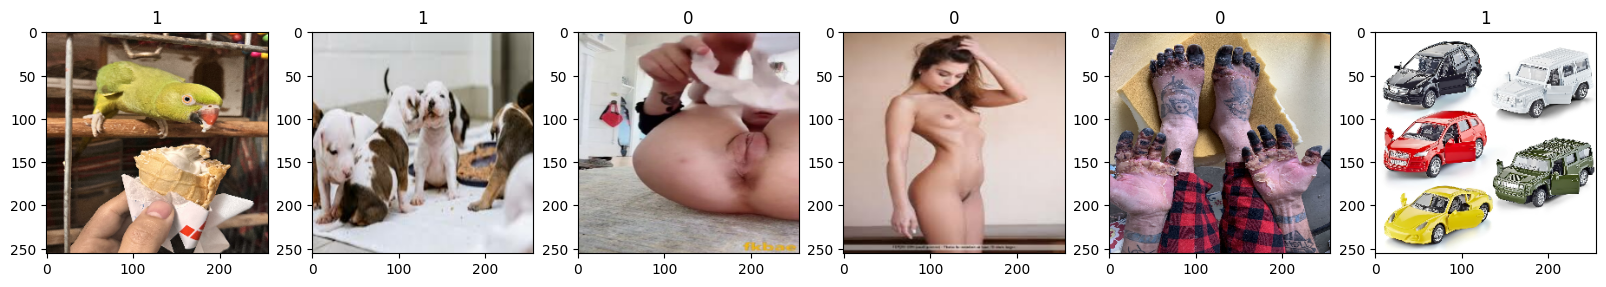

In [11]:
fig, ax = plt.subplots(ncols=6, figsize=(20,20))
for idx, img in enumerate(batch[ 0][:6]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

<h1>Labels to the images:</h1>
<h5> 1: SFW<br>0: NSFW</h5>

<h1> Data Scaling </h1>
<ul>
    <li> Changing the color intensity from 0 - 255 to 0 - 1 </li>

In [12]:
data = data.map(lambda x,y: (x/255, y))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [ ]:
data.as_numpy_iterator().next()

<h1> Splitting the data </h1>
<ul>
    <li> Training data </li>
    <li> Validation data </li>
    <li> Test data </li>
    </ul>

In [13]:
train_size = int(len(data)*.8)
val_size = int(len(data)*.1)
test_size = int(len(data)*.1)

In [14]:
train_size

28

In [15]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [16]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [17]:
train_labels = []
for features, labels in train:
    train_labels.extend(labels.numpy())

# Convert to NumPy array
train_labels = np.array(train_labels)
train_labels.shape

2024-04-14 15:34:57.983091: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


(896,)

In [18]:
val_labels = []
for features, labels in val:
    val_labels.extend(labels.numpy())

# Convert to NumPy array
val_labels = np.array(val_labels)

2024-04-14 15:35:04.428127: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


<h1> Feature Extraction using a Convolutional Model , Dense model for prediciton </h1>

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet50
from keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D

In [20]:
model = Sequential()

In [21]:
model.add(Conv2D(32, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# model = Sequential([
#     Dense(256, activation='relu', input_dim=train_features_flat.shape[1]),
#     Dropout(0.5),
#     Dense(1, activation='sigmoid')
# ])

# # Compile the model
# opt = Adam(learning_rate=0.00001)
# model.compile(opt, loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
opt = Adam(learning_rate=0.0005)
model.compile(opt, loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

<h3> Hence There are 3,701,681 Features that the model was able to identify from the given dataset of images </h3>

<h1>Training the model</h1>

In [24]:
logdir='logs'

In [25]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [26]:
# tf.keras.backend.clear_session()
tf.compat.v1.reset_default_graph

<function tensorflow.python.framework.ops.reset_default_graph()>

In [27]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])


Epoch 1/20
 1/28 [>.............................] - ETA: 1:19 - loss: 0.6922 - accuracy: 0.4688

2024-04-14 15:35:24.578132: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/28 [==============================] - ETA: 0s - loss: 0.6976 - accuracy: 0.5592

2024-04-14 15:35:36.889901: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/28 [==============================] - 22s 713ms/step - loss: 0.6976 - accuracy: 0.5592 - val_loss: 0.6043 - val_accuracy: 0.6458
Epoch 2/20
 2/28 [=>............................] - ETA: 9s - loss: 0.5954 - accuracy: 0.6719 

2024-04-14 15:35:45.971388: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/28 [==============================] - ETA: 0s - loss: 0.5643 - accuracy: 0.7165

2024-04-14 15:35:57.407603: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/28 [==============================] - 19s 617ms/step - loss: 0.5643 - accuracy: 0.7165 - val_loss: 0.5081 - val_accuracy: 0.6875
Epoch 3/20
 2/28 [=>............................] - ETA: 10s - loss: 0.6285 - accuracy: 0.6250

2024-04-14 15:36:04.404440: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/28 [==============================] - ETA: 0s - loss: 0.5266 - accuracy: 0.7411

2024-04-14 15:36:16.124200: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/28 [==============================] - 19s 621ms/step - loss: 0.5266 - accuracy: 0.7411 - val_loss: 0.4481 - val_accuracy: 0.8333
Epoch 4/20
 2/28 [=>............................] - ETA: 9s - loss: 0.4630 - accuracy: 0.8438 

2024-04-14 15:36:23.139448: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/28 [==============================] - ETA: 0s - loss: 0.4462 - accuracy: 0.8080

2024-04-14 15:36:34.497214: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/28 [==============================] - 18s 612ms/step - loss: 0.4462 - accuracy: 0.8080 - val_loss: 0.4532 - val_accuracy: 0.7917
Epoch 5/20
 2/28 [=>............................] - ETA: 10s - loss: 0.4247 - accuracy: 0.8125

2024-04-14 15:36:41.866130: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/28 [==============================] - ETA: 0s - loss: 0.3493 - accuracy: 0.8404

2024-04-14 15:36:53.746278: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/28 [==============================] - 20s 648ms/step - loss: 0.3493 - accuracy: 0.8404 - val_loss: 0.3076 - val_accuracy: 0.8854
Epoch 6/20
 2/28 [=>............................] - ETA: 9s - loss: 0.3283 - accuracy: 0.8750 

2024-04-14 15:37:01.346885: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/28 [==============================] - ETA: 0s - loss: 0.2983 - accuracy: 0.8850

2024-04-14 15:37:12.836657: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/28 [==============================] - 19s 622ms/step - loss: 0.2983 - accuracy: 0.8850 - val_loss: 0.2791 - val_accuracy: 0.9271
Epoch 7/20
 2/28 [=>............................] - ETA: 9s - loss: 0.2417 - accuracy: 0.9062 

2024-04-14 15:37:20.057315: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/28 [==============================] - ETA: 0s - loss: 0.2353 - accuracy: 0.9096

2024-04-14 15:37:31.480902: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/28 [==============================] - 19s 613ms/step - loss: 0.2353 - accuracy: 0.9096 - val_loss: 0.1929 - val_accuracy: 0.8854
Epoch 8/20
 2/28 [=>............................] - ETA: 9s - loss: 0.2649 - accuracy: 0.8281 

2024-04-14 15:37:38.624407: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/28 [==============================] - ETA: 0s - loss: 0.1888 - accuracy: 0.9252

2024-04-14 15:37:50.005493: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/28 [==============================] - 19s 616ms/step - loss: 0.1888 - accuracy: 0.9252 - val_loss: 0.2213 - val_accuracy: 0.9271
Epoch 9/20
 2/28 [=>............................] - ETA: 9s - loss: 0.1709 - accuracy: 0.9688 

2024-04-14 15:37:57.308043: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/28 [==============================] - ETA: 0s - loss: 0.1300 - accuracy: 0.9576

2024-04-14 15:38:08.339479: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/28 [==============================] - 18s 609ms/step - loss: 0.1300 - accuracy: 0.9576 - val_loss: 0.1365 - val_accuracy: 0.9375
Epoch 10/20
 2/28 [=>............................] - ETA: 10s - loss: 0.0764 - accuracy: 0.9688

2024-04-14 15:38:15.649374: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/28 [==============================] - ETA: 0s - loss: 0.0777 - accuracy: 0.9743

2024-04-14 15:38:27.253573: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/28 [==============================] - 19s 620ms/step - loss: 0.0777 - accuracy: 0.9743 - val_loss: 0.1343 - val_accuracy: 0.9583
Epoch 11/20
 2/28 [=>............................] - ETA: 9s - loss: 0.0483 - accuracy: 1.0000 

2024-04-14 15:38:34.404269: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/28 [==============================] - ETA: 0s - loss: 0.0692 - accuracy: 0.9777

2024-04-14 15:38:45.478449: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/28 [==============================] - 18s 612ms/step - loss: 0.0692 - accuracy: 0.9777 - val_loss: 0.1057 - val_accuracy: 0.9688
Epoch 12/20
 2/28 [=>............................] - ETA: 9s - loss: 0.0304 - accuracy: 1.0000 

2024-04-14 15:38:52.944874: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/28 [==============================] - ETA: 0s - loss: 0.0469 - accuracy: 0.9877

2024-04-14 15:39:04.210377: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/28 [==============================] - 19s 614ms/step - loss: 0.0469 - accuracy: 0.9877 - val_loss: 0.1102 - val_accuracy: 0.9792
Epoch 13/20
 2/28 [=>............................] - ETA: 9s - loss: 0.0298 - accuracy: 1.0000 

2024-04-14 15:39:11.482530: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/28 [==============================] - ETA: 0s - loss: 0.0356 - accuracy: 0.9933

2024-04-14 15:39:22.737055: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/28 [==============================] - 18s 606ms/step - loss: 0.0356 - accuracy: 0.9933 - val_loss: 0.1674 - val_accuracy: 0.9583
Epoch 14/20
 2/28 [=>............................] - ETA: 9s - loss: 0.0248 - accuracy: 1.0000 

2024-04-14 15:39:29.896320: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/28 [==============================] - ETA: 0s - loss: 0.0551 - accuracy: 0.9922

2024-04-14 15:39:41.158804: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/28 [==============================] - 19s 613ms/step - loss: 0.0551 - accuracy: 0.9922 - val_loss: 0.1465 - val_accuracy: 0.9688
Epoch 15/20
 1/28 [>.............................] - ETA: 55s - loss: 0.0066 - accuracy: 1.0000

2024-04-14 15:39:48.409290: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/28 [==============================] - ETA: 0s - loss: 0.0387 - accuracy: 0.9911

2024-04-14 15:40:01.785888: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/28 [==============================] - 21s 712ms/step - loss: 0.0387 - accuracy: 0.9911 - val_loss: 0.1311 - val_accuracy: 0.9688
Epoch 16/20
 2/28 [=>............................] - ETA: 9s - loss: 0.0120 - accuracy: 1.0000 

2024-04-14 15:40:09.779996: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/28 [==============================] - ETA: 0s - loss: 0.0196 - accuracy: 0.9955

2024-04-14 15:40:21.605021: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/28 [==============================] - 20s 659ms/step - loss: 0.0196 - accuracy: 0.9955 - val_loss: 0.0997 - val_accuracy: 0.9688
Epoch 17/20
 2/28 [=>............................] - ETA: 10s - loss: 0.0253 - accuracy: 0.9844

2024-04-14 15:40:29.491464: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/28 [==============================] - ETA: 0s - loss: 0.0193 - accuracy: 0.9933

2024-04-14 15:40:41.577633: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/28 [==============================] - 19s 639ms/step - loss: 0.0193 - accuracy: 0.9933 - val_loss: 0.0086 - val_accuracy: 1.0000
Epoch 18/20
 1/28 [>.............................] - ETA: 1:33 - loss: 0.0080 - accuracy: 1.0000

2024-04-14 15:40:50.286785: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/28 [==============================] - ETA: 0s - loss: 0.0152 - accuracy: 0.9978

2024-04-14 15:41:02.626404: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/28 [==============================] - 22s 700ms/step - loss: 0.0152 - accuracy: 0.9978 - val_loss: 0.1289 - val_accuracy: 0.9688
Epoch 19/20
 2/28 [=>............................] - ETA: 9s - loss: 0.0059 - accuracy: 1.0000 

2024-04-14 15:41:11.270065: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/28 [==============================] - ETA: 0s - loss: 0.0099 - accuracy: 0.9978

2024-04-14 15:41:24.351893: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/28 [==============================] - 20s 679ms/step - loss: 0.0099 - accuracy: 0.9978 - val_loss: 0.0141 - val_accuracy: 1.0000
Epoch 20/20
 2/28 [=>............................] - ETA: 8s - loss: 0.0038 - accuracy: 1.0000 

2024-04-14 15:41:31.758937: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/28 [==============================] - ETA: 0s - loss: 0.0102 - accuracy: 0.9967

2024-04-14 15:41:44.049762: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/28 [==============================] - 20s 661ms/step - loss: 0.0102 - accuracy: 0.9967 - val_loss: 0.0867 - val_accuracy: 0.9688


<h1> Evaluating the Model </h1>
<ul>
    <li> Plotting the training loss and validation loss</li>
    <li> Plotting the training accuracy and validation accuracy </li>
    <li> Precision </li>
    <li> Recall </li>
    <li> Binary Accuracy </li>
    </ul>
    

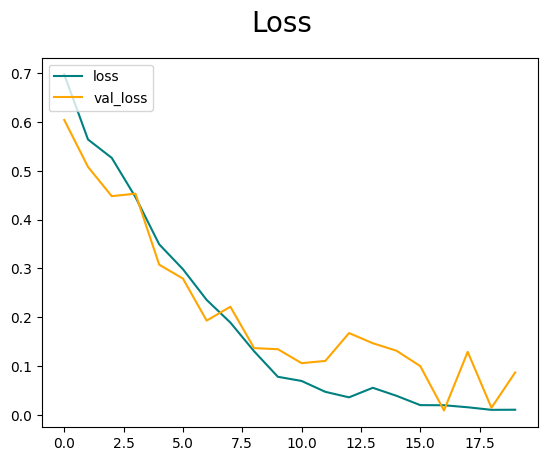

In [28]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

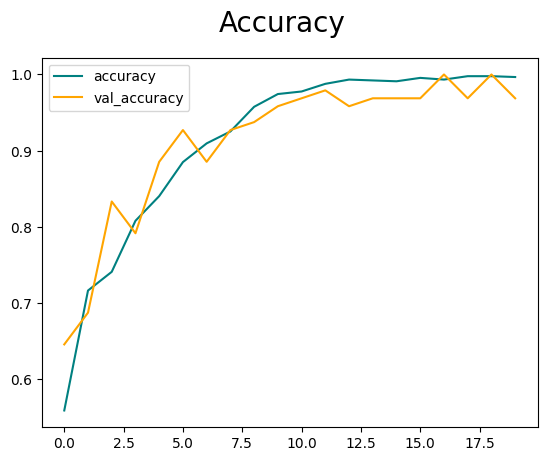

In [29]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [30]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [31]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [32]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

2024-04-14 15:43:15.386709: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


1/1 [==============================] - 0s 134ms/step


In [33]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.9310345, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.9583333, shape=(), dtype=float32)


<h1>Creating a nsfw Text detection model </h1>

In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np

# Load dataset
text_dataset = pd.read_csv('textdata/reddit_200k_train.csv', encoding="ISO-8859-1")
raw_train_input = text_dataset['body']
raw_train_output = text_dataset['REMOVED']

# Tokenization
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=80000)
tokenizer.fit_on_texts(raw_train_input)
word_index = tokenizer.word_index

# Preprocess data
X_train = tokenizer.texts_to_sequences(raw_train_input)
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, padding='post', maxlen=255)
y_train = np.array(raw_train_output, dtype=np.uint8)

# Define model
text_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(80000, 16),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.2),  # Dropout for regularization
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile model
text_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
text_model.fit(X_train, y_train, epochs=20, batch_size=512, verbose=1)

# Evaluate model
test_dataset = pd.read_csv('textdata/reddit_200k_test.csv', encoding="ISO-8859-1")
raw_test_input = test_dataset['body']
raw_test_output = test_dataset['REMOVED']

X_test = tokenizer.texts_to_sequences(raw_test_input)
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, padding='post', maxlen=255)
y_test = np.array(raw_test_output, dtype=np.uint8)

text_model.evaluate(X_test, y_test)


<h1> Reddit pipeline </h1>

In [34]:
reddit = config_reddit()
reddit_nsfw_dataset = get_nsfw_posts(reddit)
reddit_sfw_dataset = get_sfw_posts(reddit)

for img in reddit_sfw_dataset["images"]:
    resize = tf.image.resize(img, (256,256))
    yhat = model.predict(np.expand_dims(resize/255, 0))
    if yhat > 0.5: 
        print(f'Predicted class is sfw')
    else:
        print(f'Predicted class is nsfw')
        
for img in reddit_nsfw_dataset["images"]:
    resize = tf.image.resize(img, (256,256))
    yhat = model.predict(np.expand_dims(resize/255, 0))
    if yhat > 0.5: 
        print(f'Predicted class is sfw')
    else:
        print(f'Predicted class is nsfw')

https://i.redd.it/ewxmuikh3fuc1.jpeg
Shape of image: (224, 224, 3)
https://i.redd.it/v4t249pzxeuc1.jpeg
Shape of image: (224, 224, 3)
https://i.redd.it/drilorahxeuc1.jpeg
Shape of image: (224, 224, 3)
https://i.redd.it/92r877zgxeuc1.jpeg
Shape of image: (224, 224, 3)
https://i.redgifs.com/i/unluckygrownmerganser.jpg
erro : cannot identify image file <_io.BytesIO object at 0x7c81b0226840>
https://i.redd.it/sptzubrbqeuc1.jpeg
Shape of image: (224, 224, 3)
https://i.redd.it/nfxn3nj3qeuc1.jpeg
Shape of image: (224, 224, 3)
https://i.redd.it/ur3hwxwrkeuc1.jpeg
Shape of image: (224, 224, 3)
https://i.redd.it/wcb9nomgfeuc1.jpeg
Shape of image: (224, 224, 3)
https://i.redd.it/75gyl9v6aeuc1.jpeg
Shape of image: (224, 224, 3)
https://i.redd.it/qhc9qkz09euc1.jpeg
Shape of image: (224, 224, 3)
https://i.redd.it/y6xc5rlc7euc1.jpeg
Shape of image: (224, 224, 3)
https://i.redd.it/29ahxnc37euc1.jpeg
Shape of image: (224, 224, 3)
https://i.redd.it/yw55j0c07euc1.jpeg
Shape of image: (224, 224, 3)
https:

<h1> Reddit Moderation Pipeline </h1>

In [37]:
def get_unmoderated_posts(subreddit):
    unmoderated_lists = list(subreddit.mod.unmoderated())
    images={}
    count = 0
    for submission in unmoderated_lists:
        if submission.url and submission.url.endswith(('jpg', 'jpeg', 'png')):
            print(submission.url)
            try:
                response = requests.get(submission.url)
                if response.status_code == 200:
                    img = Image.open(BytesIO(response.content))
                    img = img.resize((224,224))
                    img_array = np.array(img)
                    print(f"Shape of image: {img_array.shape}")
                    if(img_array.shape) != (224,224,3):
                        continue
                    images[submission] = img_array
                    count += 1
                else:
                    print("failed to get the image")
            except Exception as e:
                print(f"erro : {e}")
    return images
        
    

In [ ]:
def get_unmoderated_posts_text(subreddit):
    unmoderated_lists = list(subreddit.mod.unmoderated())
    contents={}
    count = 0
    for submission in unmoderated_lists:
        content = submission.selftext
        if(len(content) > 0):
            contents[submission] = content
            
    return contents

In [5]:
# Getting the unmoderated images

subreddit = reddit.subreddit("projectTest2")
unmoderated_images = get_unmoderated_posts(subreddit)

if(len(unmoderated_images) == 0):
    print("moderation queue is empty!!!")
else:
    for umod_submission in unmoderated_images.keys():
        img = unmoderated_images[umod_submission]
        resize = tf.image.resize(img, (256,256))
        yhat = model.predict(np.expand_dims(resize/255, 0))
        if yhat > 0.5: 
            print(f'Predicted class is sfw')
            umod_submission.mod.sfw()
            umod_submission.mod.approve()
        else:
            print(f'Predicted class is nsfw')
            umod_submission.mod.remove()

NameError: name 'reddit' is not defined

In [ ]:
subreddit = reddit.subreddit("projectTest2")
unmoderated_text = get_unmoderated_posts(subreddit)

if(len(unmoderated_text) == 0):
    print("moderation queue is empty!!!")
else:
    for umod_submission in unmoderated_text.keys():
        content = unmoderated_images[umod_submission]
        encoded_text = tokenizer.texts_to_sequences(content)
        padded_text = tf.keras.preprocessing.sequence.pad_sequences(encoded_text, padding='post', maxlen=255)
        yhat = model.predict(padded_text)
        if yhat < 0.6: 
            print(f'Predicted class is sfw')
            umod_submission.mod.sfw()
            umod_submission.mod.approve()
        else:
            print(f'Predicted class is nsfw')
            umod_submission.mod.remove()

<br>

<h1> Saving the models </h1>

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models','imageclassifier.h5'))

In [ ]:
new_model = load_model('imageclassifier.h5')

In [ ]:
new_model.predict(np.expand_dims(resize/255, 0))